# Experiments with binary data
This notebook contains code for running experiments and plotting figures for the binary data experiment. Running the full experiments may take some time (~1 day for my laptop), but it's also possible to make them smaller by decreasing the sample sizes or the amount of times you sample from each size (through the variables datasize and param_times in the first section)

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from cevaetools import *
from CEVAE import *
%load_ext autoreload
%autoreload 2

# Generate new data

In [3]:
main_folder = "binary_data_tests"

In [4]:
#binary_data_tests/params1 contains the data generating parameters
sub_folder_params = "params1"
dataparameters = load_dataparameters(main_folder, sub_folder_params)
[z_probs, x_probs, t_probs, y_probs] = dataparameters

In [5]:
dataparameters

[array([0.4420614, 0.5579386]),
 array([[[0.43684005, 0.56315995],
         [0.06179378, 0.93820622]],
 
        [[0.2741188 , 0.7258812 ],
         [0.73717898, 0.26282102]]]),
 array([[0.28839968, 0.71160032],
        [0.83942868, 0.16057132]]),
 array([[[0.43142654, 0.56857346],
         [0.63851799, 0.36148201]],
 
        [[0.83465701, 0.16534299],
         [0.96004124, 0.03995876]]])]

In [6]:
datasize = [1000,3000,5000,10000,15000,20000,30000,40000,60000,80000]
dataparameters = [[dsize]+[z_probs, x_probs, t_probs, y_probs] for dsize in datasize]
data_sub_folder = "params1data1000to80000"
param_times = 10

In [7]:
dfs, datasets = create_dfs_datasets(categorical_data_df, dataparameters, param_times=param_times, repeat=False, 
                    main_folder=main_folder, sub_folder=data_sub_folder, labels=datasize, overwrite=True)

In [9]:
#This is for getting better estimates of the distribution of the analytical method.
#It could be used for CEVAE as well, but the estimates seem to be more closely distributed there,
#so it is not completely necessary
data_sub_folder = "params1data1000to80000_additional"
param_times_extra = 40
dfs_extra, datasets_extra = create_dfs_datasets(categorical_data_df, dataparameters, param_times=param_times_extra, repeat=False, 
                    main_folder=main_folder, sub_folder=data_sub_folder, labels=datasize, overwrite=True)

In [8]:
dfs, datasets = load_dfs(main_folder, data_sub_folder, param_times=param_times)
datasize = sorted([int(ds) for ds in dfs.keys()])

# Run experiments with regular, full NNs

In [27]:
BATCH_SIZE = 200
track_function = lambda model: estimate_model_py_dot(model,n=10000)
true_value = estimate_true_py_dot(z_probs,y_probs)
device = 'cpu'

num_epochs=300
lr_start=0.01
lr_end=0.0005
z_dim=10
p_y_zt_nn_layers=3
p_y_zt_nn_width=30
p_t_z_nn_layers=3
p_t_z_nn_width=30
p_x_z_nn_layers=3
p_x_z_nn_width=30
q_z_nn_layers=3
q_z_nn_width=30
t_mode=2
y_mode=2
x_mode=np.array([2,2])
x_dim = 2
ty_separate_enc=False
z_mode=0

train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode]

sub_folder_model = "params1data1000to80000NNmodels"
labels = [str(dsize) for dsize in datasize]
data_labels = [str(dsize) for dsize in datasize]

Label  60000


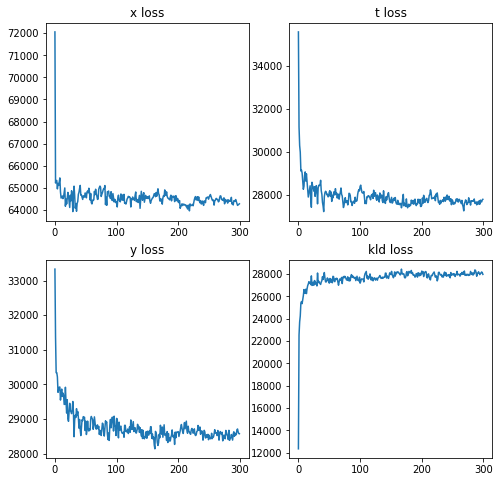

Total loss in the end:  148614.64419555664
Estimated causal effect: [[0.64865497 0.35134503]
 [0.84407982 0.15592018]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


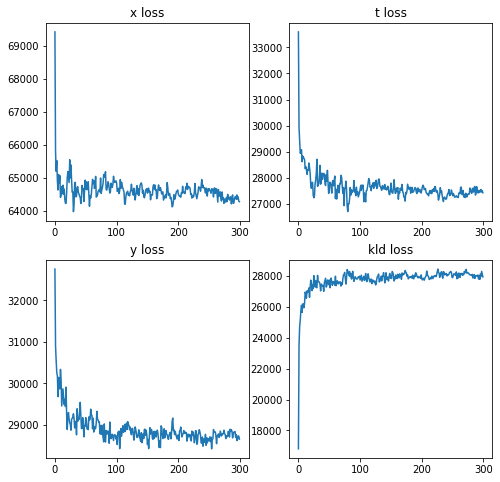

Total loss in the end:  148326.24295043945
Estimated causal effect: [[0.63995647 0.36004353]
 [0.83903618 0.16096382]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


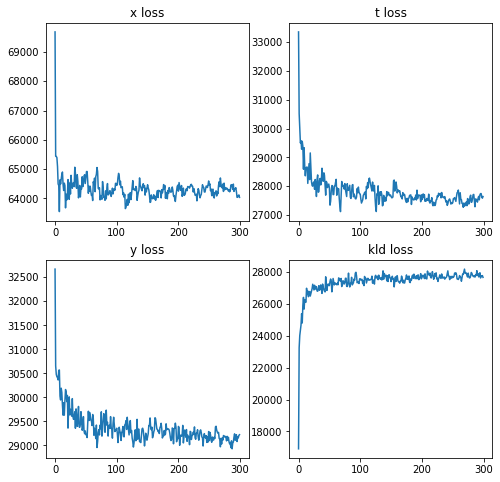

Total loss in the end:  148569.10946655273
Estimated causal effect: [[0.64103252 0.35896748]
 [0.83635519 0.16364481]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


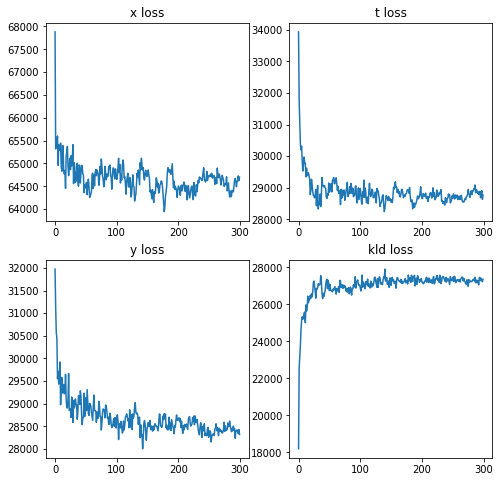

Total loss in the end:  149131.87521362305
Estimated causal effect: [[0.63871571 0.36128429]
 [0.84269783 0.15730217]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


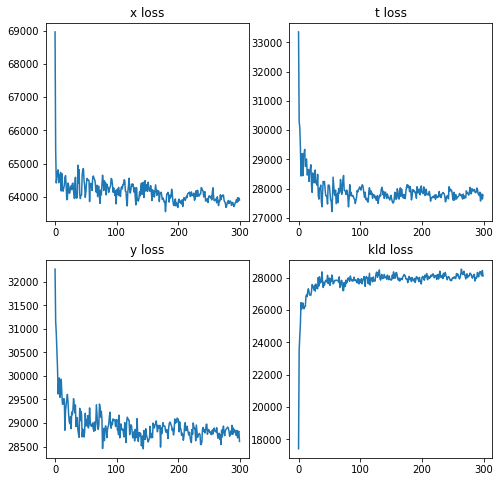

Total loss in the end:  148393.91571044922
Estimated causal effect: [[0.63695446 0.36304554]
 [0.84112538 0.15887462]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


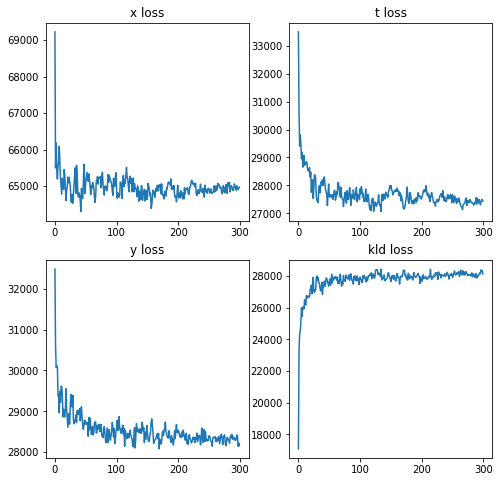

Total loss in the end:  148686.33346557617
Estimated causal effect: [[0.64246315 0.35753685]
 [0.84369892 0.15630108]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


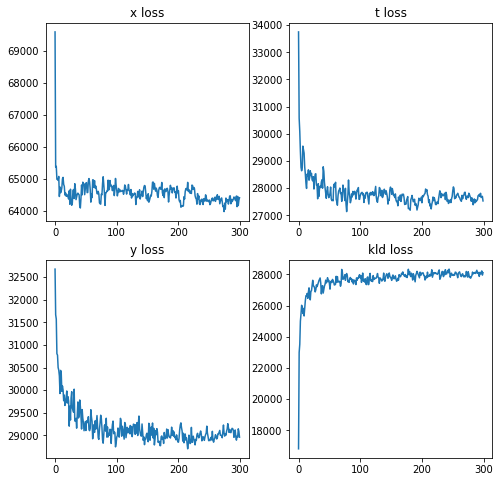

Total loss in the end:  149007.81707763672
Estimated causal effect: [[0.63983926 0.36016074]
 [0.8369315  0.1630685 ]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


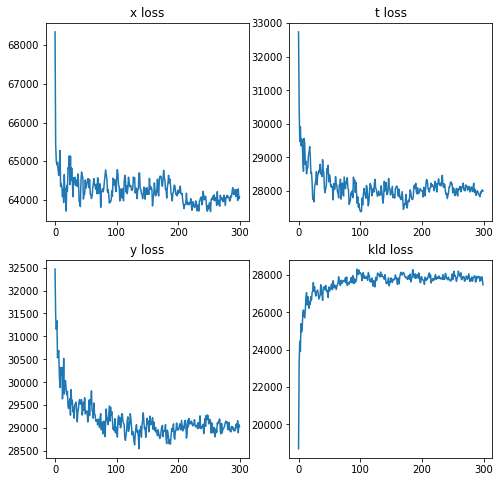

Total loss in the end:  148579.86282348633
Estimated causal effect: [[0.64477438 0.35522562]
 [0.83958033 0.16041967]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


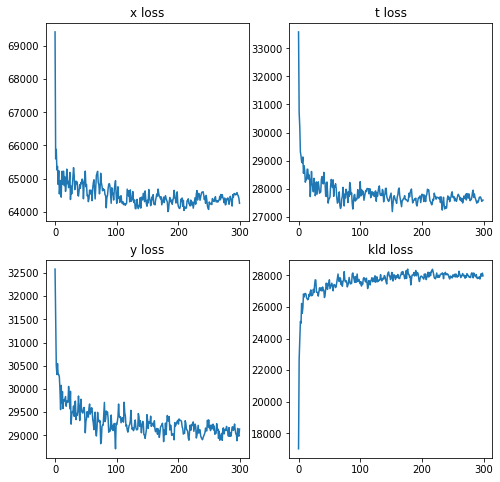

Total loss in the end:  148951.0863647461
Estimated causal effect: [[0.6437223  0.3562777 ]
 [0.83329423 0.16670577]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


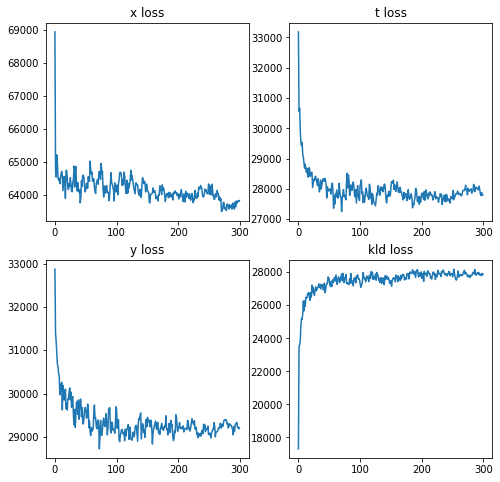

Total loss in the end:  148713.26278686523
Estimated causal effect: [[0.63831788 0.36168212]
 [0.83362892 0.16637108]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]
Label  80000


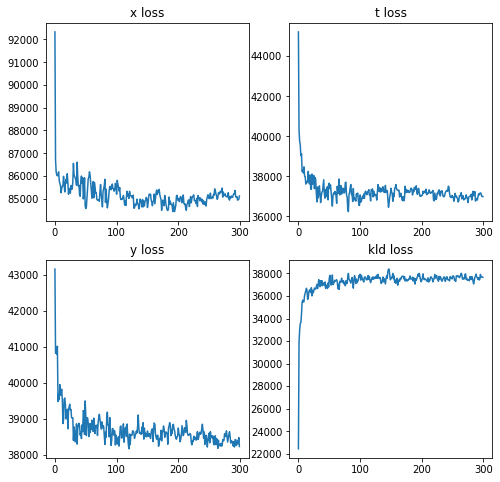

Total loss in the end:  197991.84176635742
Estimated causal effect: [[0.63747093 0.36252907]
 [0.8306455  0.1693545 ]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


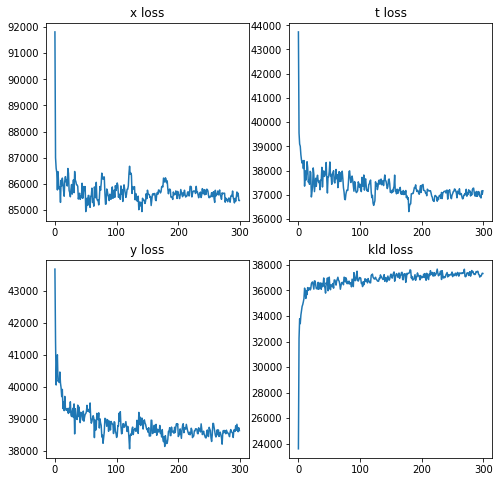

Total loss in the end:  198492.59817504883
Estimated causal effect: [[0.64467448 0.35532552]
 [0.83786483 0.16213517]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


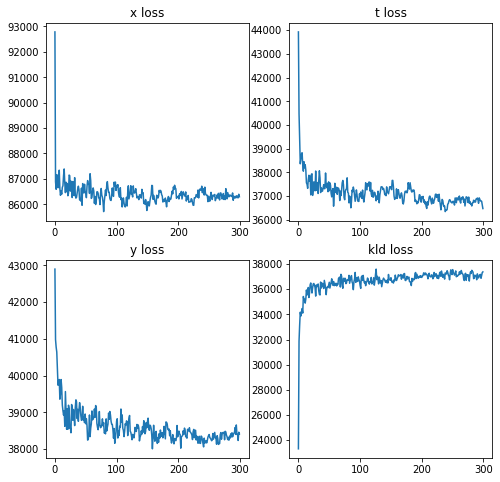

Total loss in the end:  198551.49642944336
Estimated causal effect: [[0.64239612 0.35760388]
 [0.83541064 0.16458936]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


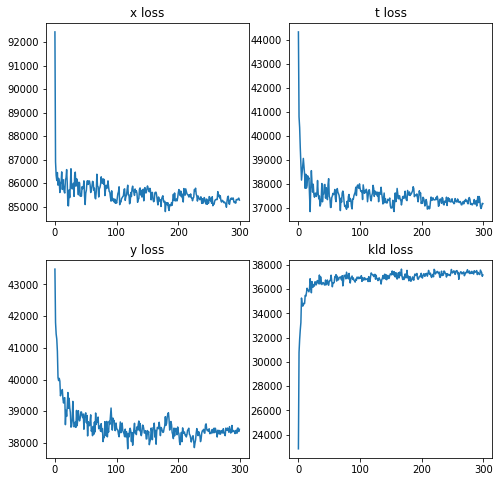

Total loss in the end:  198050.16540527344
Estimated causal effect: [[0.64663237 0.35336763]
 [0.83840682 0.16159318]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


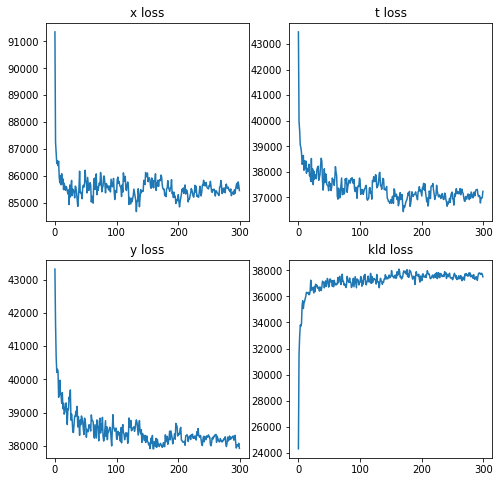

Total loss in the end:  198121.31497192383
Estimated causal effect: [[0.6436888  0.3563112 ]
 [0.84755184 0.15244816]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


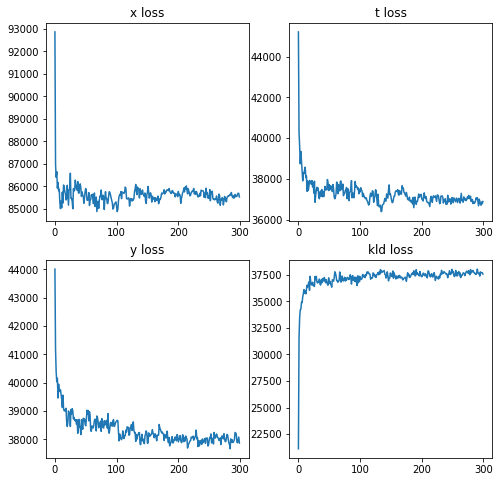

Total loss in the end:  197827.06759643555
Estimated causal effect: [[0.64733768 0.35266232]
 [0.84266289 0.15733711]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


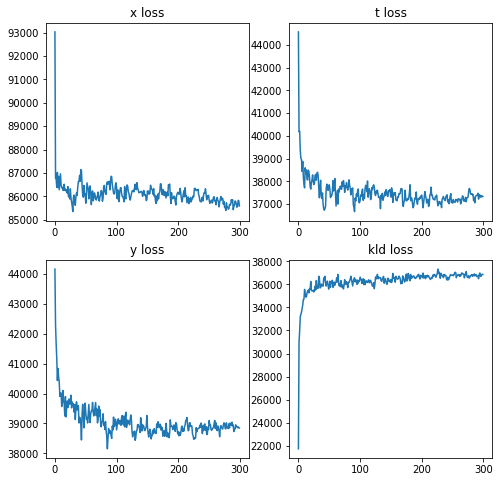

Total loss in the end:  198623.59719848633
Estimated causal effect: [[0.63600913 0.36399087]
 [0.83746895 0.16253105]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


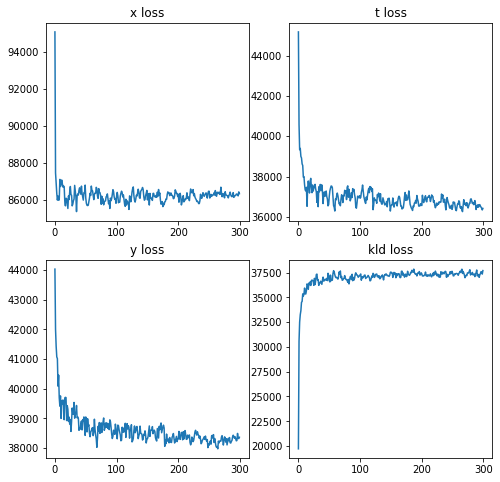

Total loss in the end:  198811.85440063477
Estimated causal effect: [[0.63574794 0.36425206]
 [0.84490985 0.15509015]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


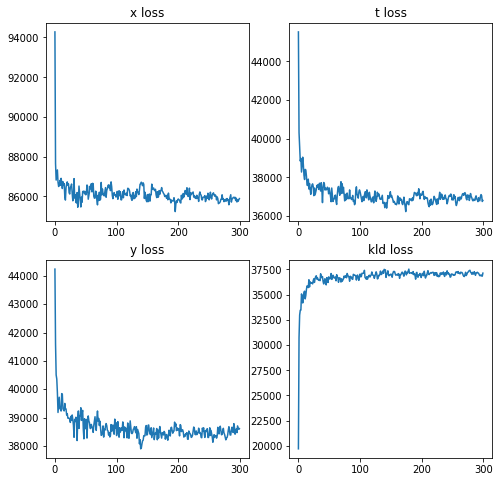

Total loss in the end:  198440.92449951172
Estimated causal effect: [[0.64685255 0.35314745]
 [0.8396201  0.1603799 ]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


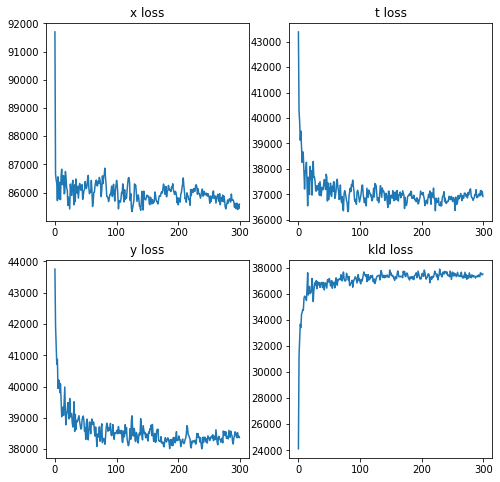

Total loss in the end:  198385.4028930664
Estimated causal effect: [[0.64824998 0.35175002]
 [0.84514582 0.15485418]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


In [31]:
# Run the model
models, losses = run_model_for_predef_datasets(datasets, param_times, main_folder, sub_folder_model, 
                                               BATCH_SIZE, track_function, true_value, 
                                               device, train_arguments, labels, data_labels, overwrite=True)

# Run experiments with NNs, but binary z

In [54]:
BATCH_SIZE = 200
track_function = lambda model: estimate_model_py_dot(model,n=10000)
true_value = estimate_true_py_dot(z_probs,y_probs)
device = 'cpu'

num_epochs=300
lr_start=0.01
lr_end=0.0005
z_dim=1
p_y_zt_nn_layers=3
p_y_zt_nn_width=30
p_t_z_nn_layers=3
p_t_z_nn_width=30
p_x_z_nn_layers=3
p_x_z_nn_width=30
q_z_nn_layers=3
q_z_nn_width=30
t_mode=2
y_mode=2
x_mode=np.array([2,2])
x_dim = 2
ty_separate_enc=False
z_mode=2

train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode]

sub_folder_model = "params1data1000to80000NNmodelsbinaryz"
labels = [str(dsize) for dsize in datasize]
data_labels = [str(dsize) for dsize in datasize]

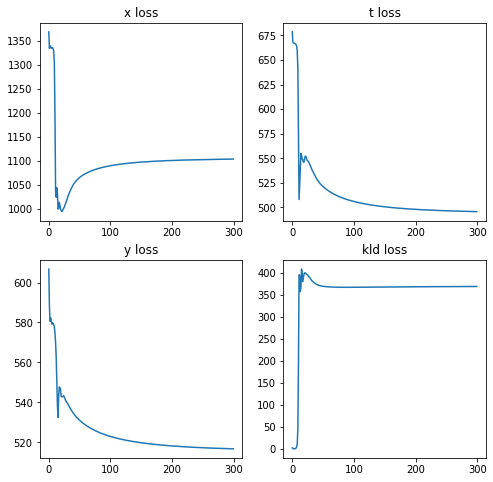

Total loss in the end:  2485.5503845214844
Estimated causal effect: [[0.65998602 0.34001398]
 [0.82727909 0.17272086]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


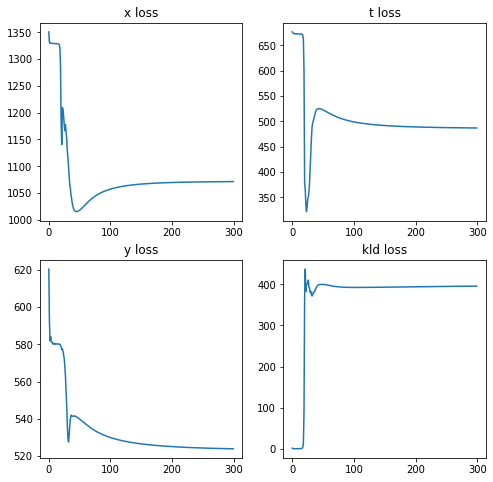

Total loss in the end:  2477.8714904785156
Estimated causal effect: [[0.63176668 0.36823332]
 [0.82053614 0.17946386]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


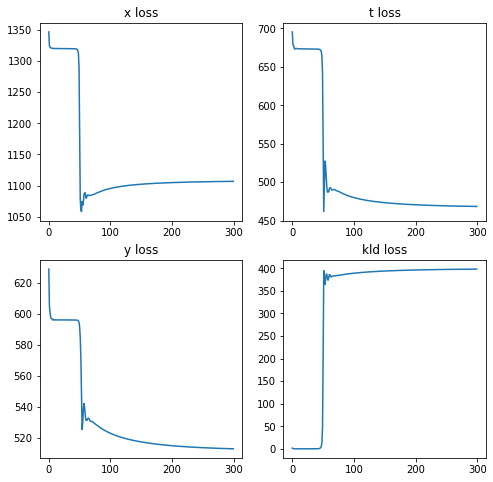

Total loss in the end:  2486.283935546875
Estimated causal effect: [[0.58667058 0.41332945]
 [0.83755618 0.1624438 ]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


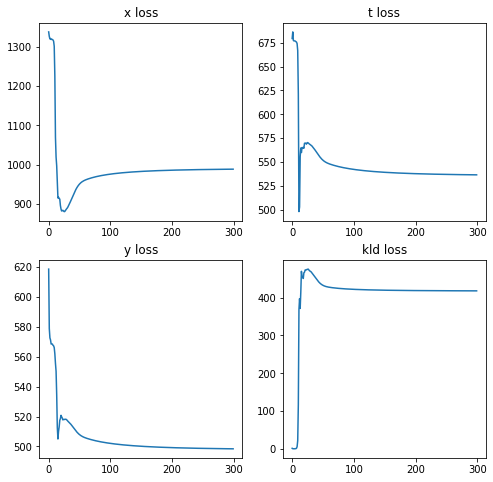

Total loss in the end:  2441.4575805664062
Estimated causal effect: [[0.68480313 0.31519687]
 [0.78784335 0.21215664]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


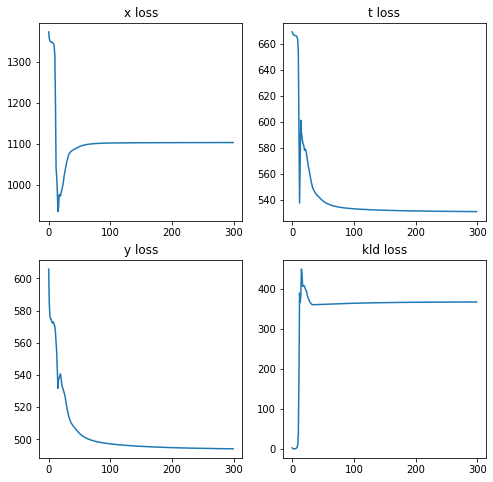

Total loss in the end:  2494.6687622070312
Estimated causal effect: [[0.63942945 0.36057055]
 [0.8127259  0.18727407]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


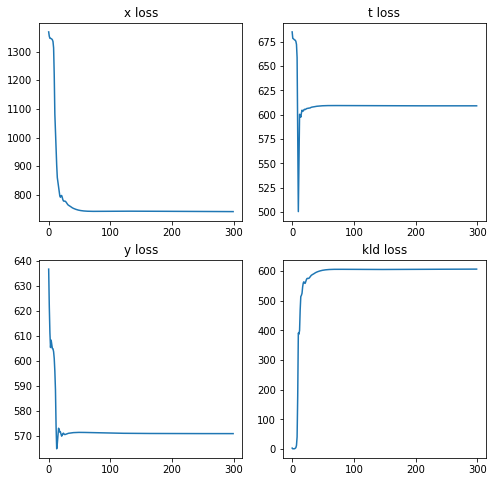

Total loss in the end:  2527.640899658203
Estimated causal effect: [[0.69354761 0.30645242]
 [0.74518037 0.25481963]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


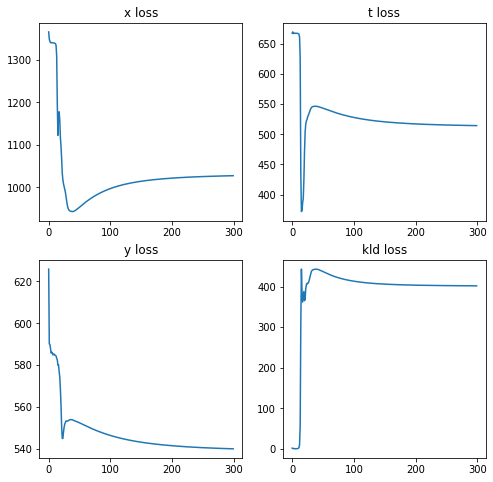

Total loss in the end:  2483.566650390625
Estimated causal effect: [[0.69145244 0.30854753]
 [0.79298437 0.20701559]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


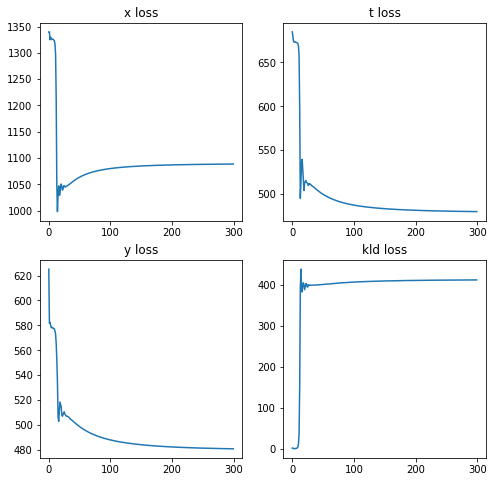

Total loss in the end:  2461.0198364257812
Estimated causal effect: [[0.61894584 0.38105419]
 [0.83277583 0.16722418]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


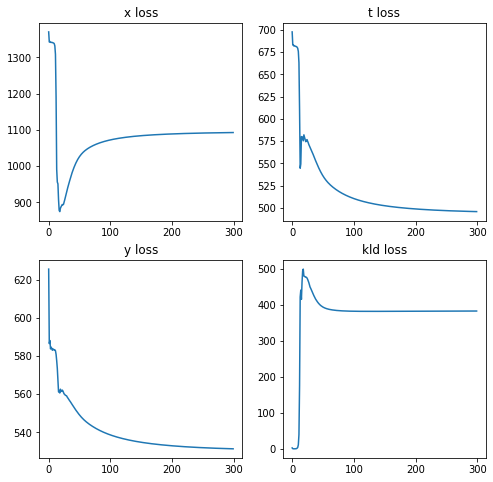

Total loss in the end:  2503.1595764160156
Estimated causal effect: [[0.66068363 0.33931631]
 [0.79840517 0.2015948 ]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


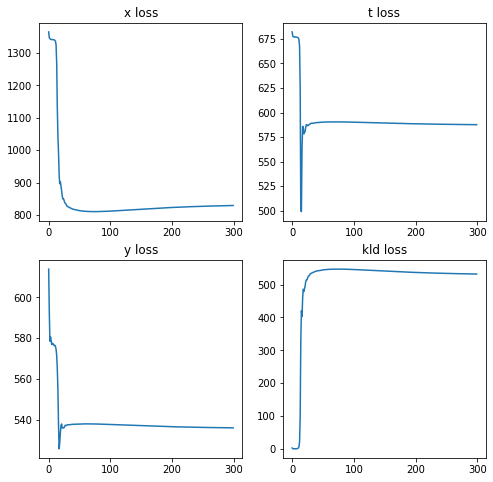

Total loss in the end:  2484.643585205078
Estimated causal effect: [[0.70086074 0.29913926]
 [0.78300405 0.21699589]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


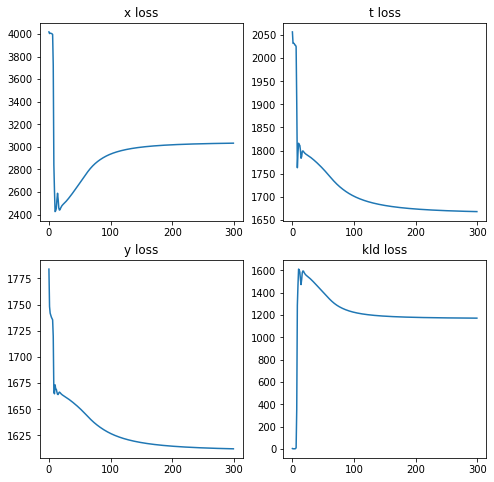

Total loss in the end:  7484.184783935547
Estimated causal effect: [[0.68602687 0.31397307]
 [0.80819404 0.19180594]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


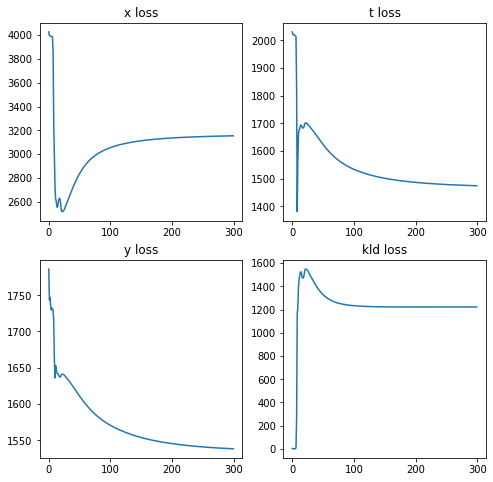

Total loss in the end:  7389.6146240234375
Estimated causal effect: [[0.65816295 0.34183708]
 [0.83569211 0.16430794]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


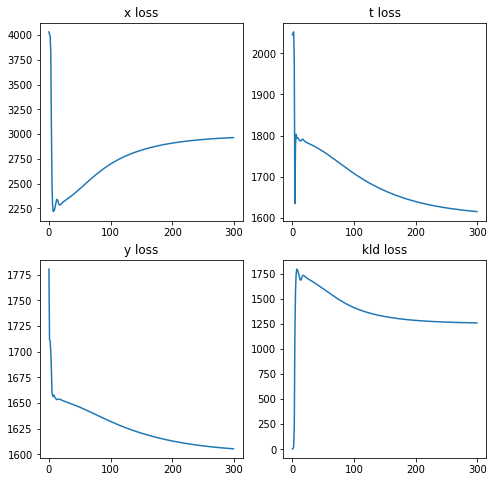

Total loss in the end:  7446.888885498047
Estimated causal effect: [[0.70174098 0.29825899]
 [0.77901453 0.22098544]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


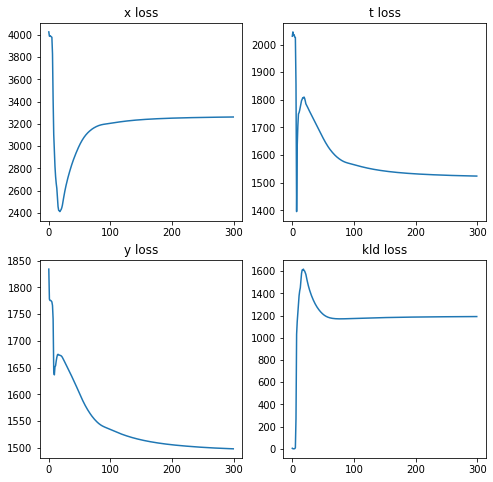

Total loss in the end:  7474.266021728516
Estimated causal effect: [[0.60575956 0.39424044]
 [0.79728729 0.20271271]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


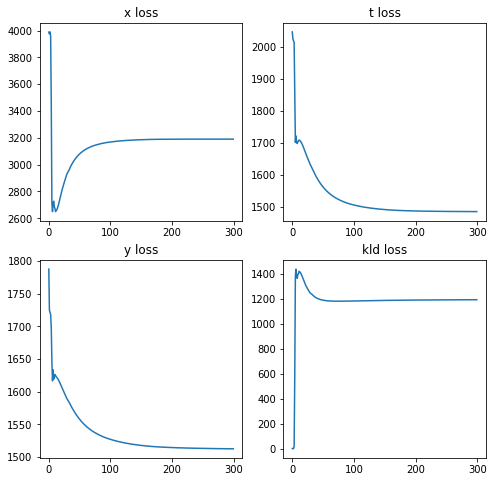

Total loss in the end:  7380.011322021484
Estimated causal effect: [[0.64938009 0.35061988]
 [0.79745662 0.20254341]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


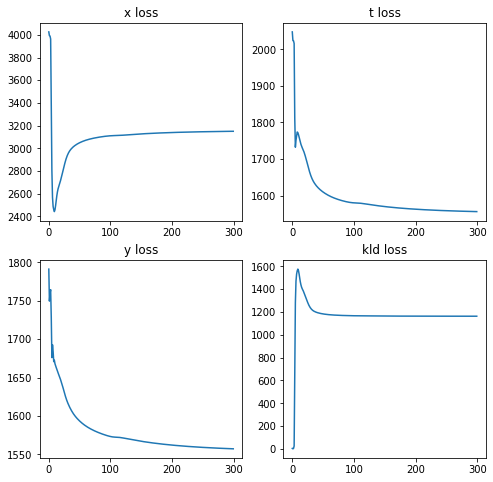

Total loss in the end:  7426.715423583984
Estimated causal effect: [[0.65939397 0.340606  ]
 [0.83029771 0.16970225]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


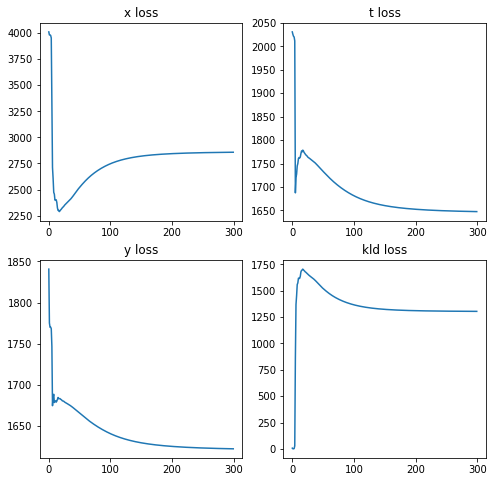

Total loss in the end:  7431.838165283203
Estimated causal effect: [[0.66132486 0.33867514]
 [0.78941798 0.210582  ]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


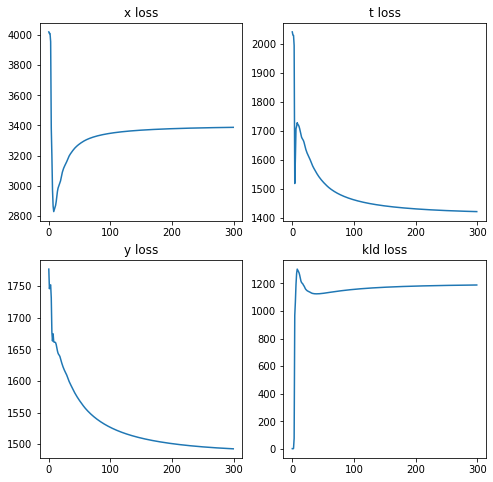

Total loss in the end:  7489.779541015625
Estimated causal effect: [[0.57863235 0.42136765]
 [0.83363652 0.16636351]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


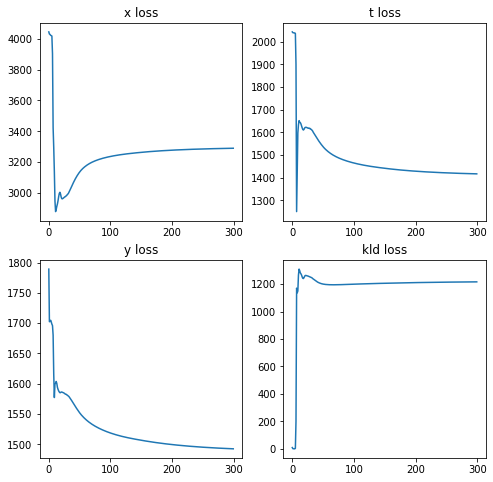

Total loss in the end:  7415.617126464844
Estimated causal effect: [[0.63933647 0.36066359]
 [0.83830953 0.16169049]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


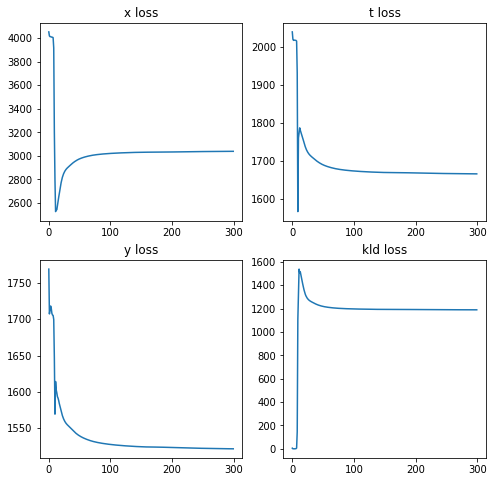

Total loss in the end:  7415.101013183594
Estimated causal effect: [[0.69332403 0.30667597]
 [0.80542034 0.19457968]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


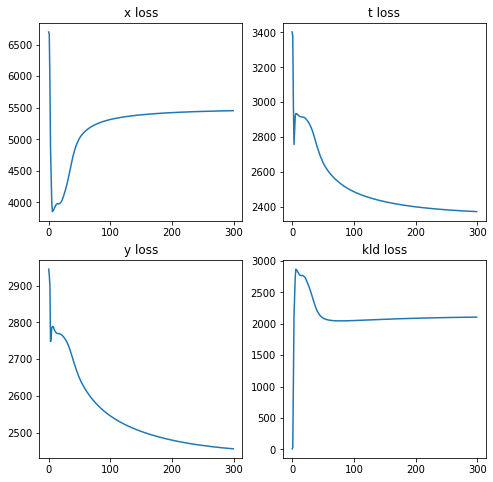

Total loss in the end:  12387.450012207031
Estimated causal effect: [[0.60426861 0.39573136]
 [0.82363027 0.17636973]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


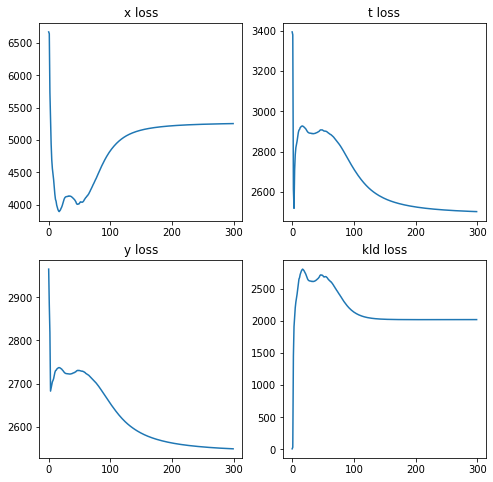

Total loss in the end:  12331.118865966797
Estimated causal effect: [[0.6652413  0.3347587 ]
 [0.81980598 0.18019405]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


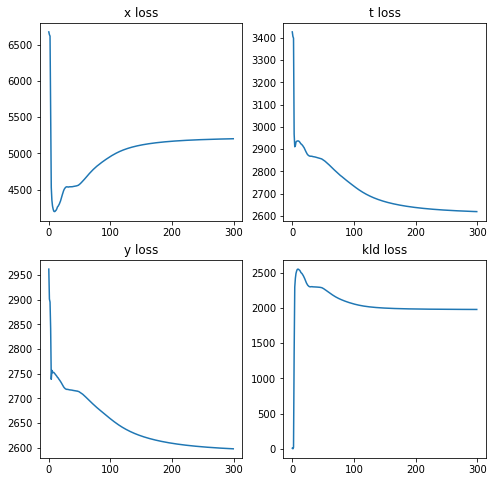

Total loss in the end:  12396.42758178711
Estimated causal effect: [[0.65401685 0.34598315]
 [0.81922531 0.1807747 ]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


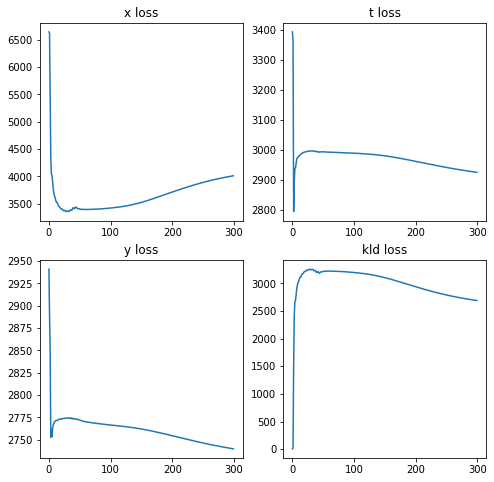

Total loss in the end:  12361.99072265625
Estimated causal effect: [[0.70706648 0.29293346]
 [0.77318913 0.22681086]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


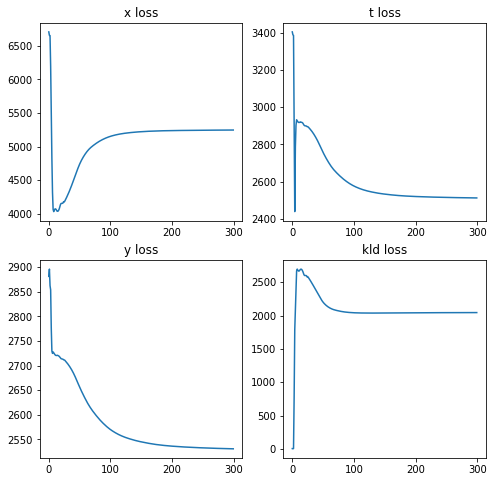

Total loss in the end:  12332.964324951172
Estimated causal effect: [[0.63638437 0.36361563]
 [0.81196928 0.18803073]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


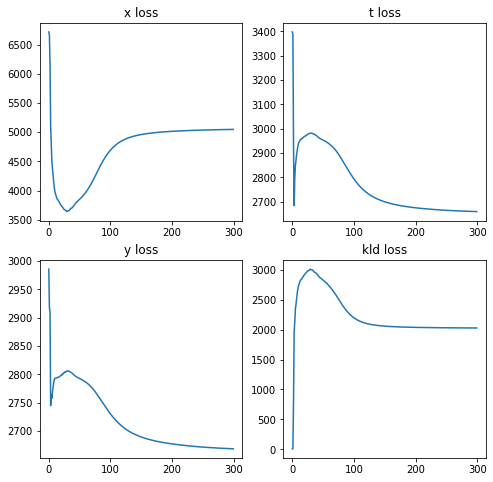

Total loss in the end:  12405.015533447266
Estimated causal effect: [[0.66966176 0.33033824]
 [0.81721914 0.18278089]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


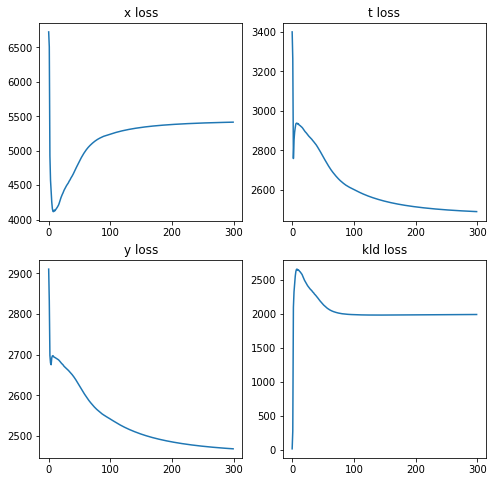

Total loss in the end:  12360.30728149414
Estimated causal effect: [[0.64345276 0.35654718]
 [0.83373183 0.16626818]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


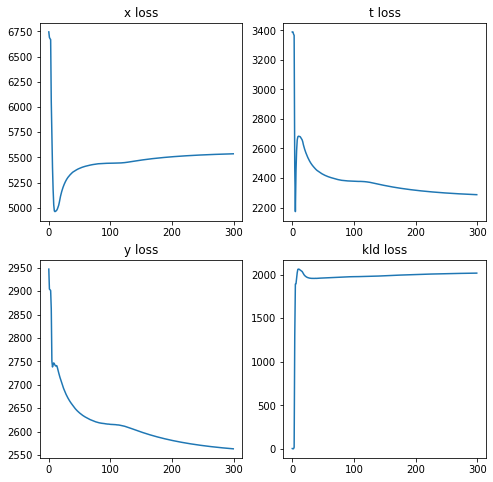

Total loss in the end:  12402.23519897461
Estimated causal effect: [[0.60461271 0.39538729]
 [0.85062456 0.14937548]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


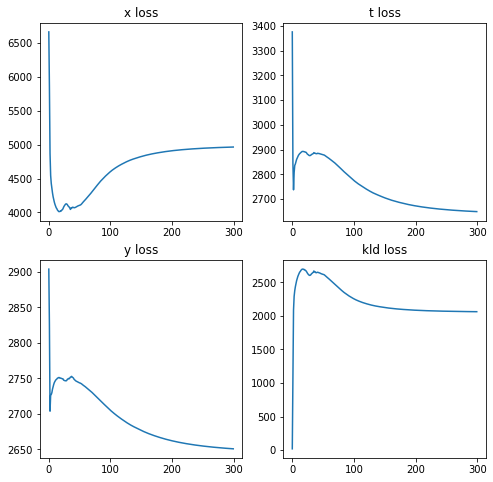

Total loss in the end:  12327.969146728516
Estimated causal effect: [[0.70012552 0.29987445]
 [0.80223167 0.19776838]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


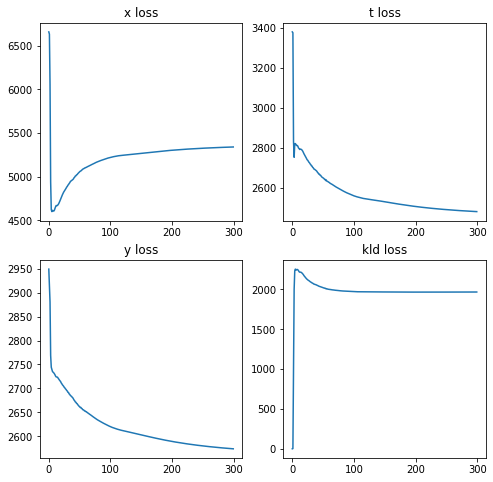

Total loss in the end:  12359.629150390625
Estimated causal effect: [[0.64614308 0.35385689]
 [0.81728983 0.18271022]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


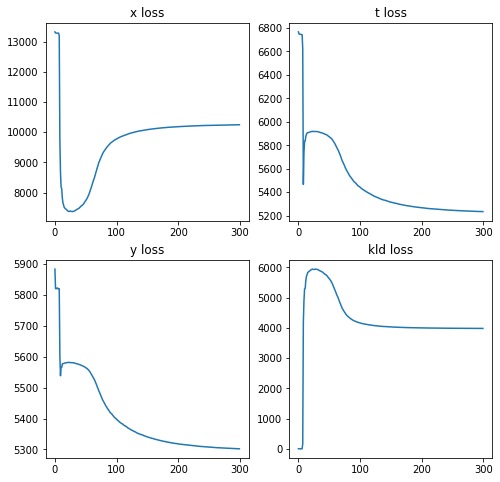

Total loss in the end:  24766.160583496094
Estimated causal effect: [[0.67398322 0.32601678]
 [0.81763691 0.18236308]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


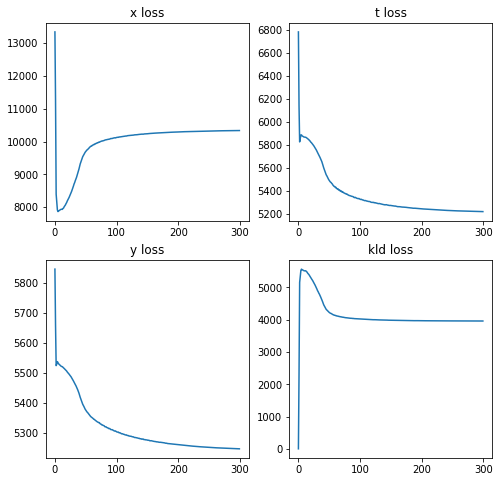

Total loss in the end:  24759.101684570312
Estimated causal effect: [[0.67108566 0.32891434]
 [0.80074251 0.19925752]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


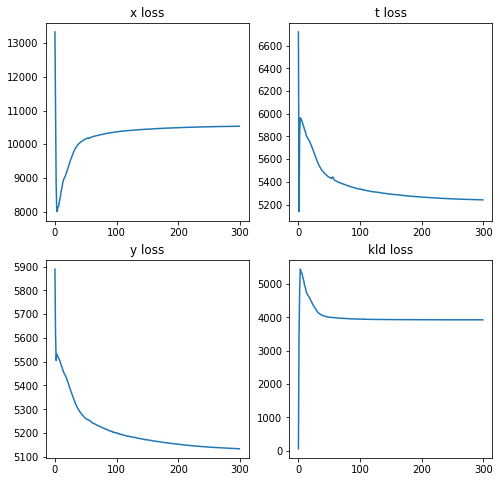

Total loss in the end:  24834.732452392578
Estimated causal effect: [[0.65437782 0.34562215]
 [0.82615614 0.17384389]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


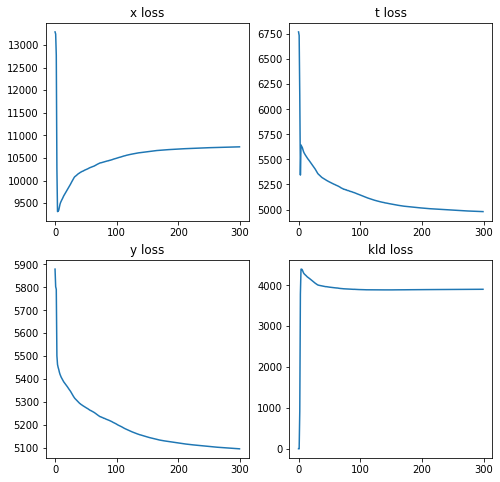

Total loss in the end:  24722.959533691406
Estimated causal effect: [[0.6456567  0.35434332]
 [0.82724476 0.17275523]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


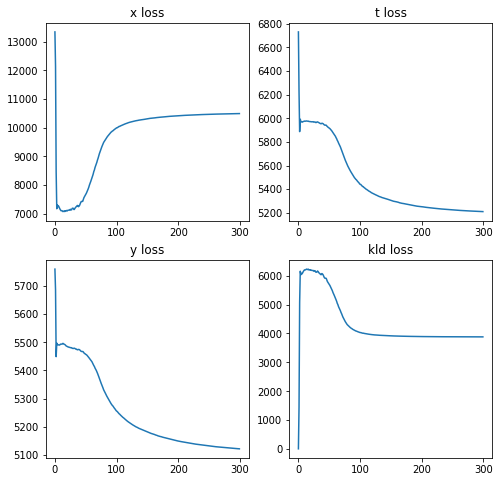

Total loss in the end:  24708.607452392578
Estimated causal effect: [[0.67191881 0.32808119]
 [0.82719171 0.17280824]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


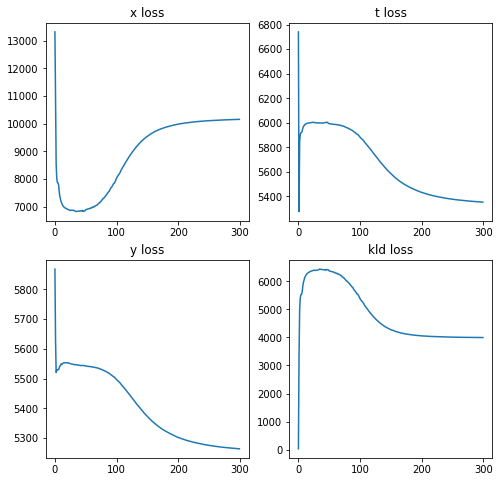

Total loss in the end:  24773.514434814453
Estimated causal effect: [[0.67775297 0.32224706]
 [0.80551422 0.19448574]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


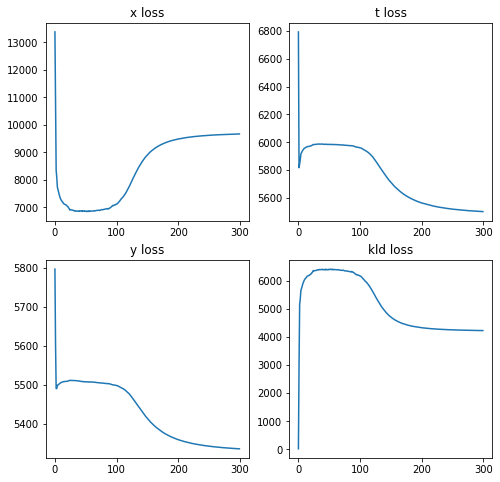

Total loss in the end:  24739.98455810547
Estimated causal effect: [[0.70105267 0.29894736]
 [0.79768509 0.20231493]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


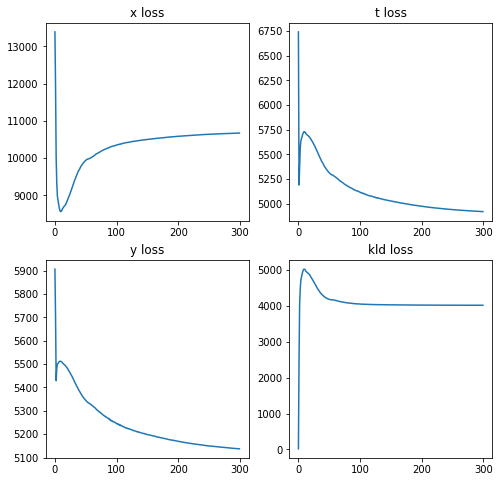

Total loss in the end:  24752.068450927734
Estimated causal effect: [[0.63671613 0.36328387]
 [0.8207171  0.17928295]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


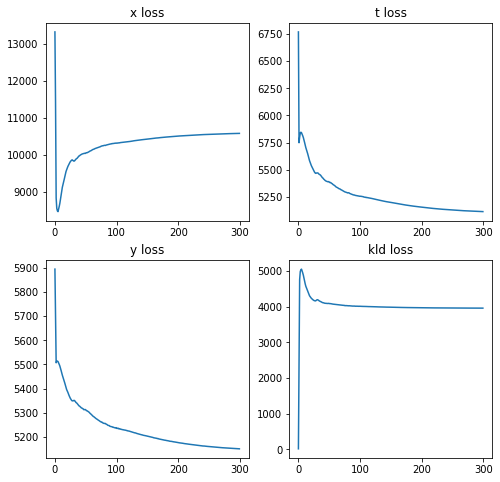

Total loss in the end:  24806.561004638672
Estimated causal effect: [[0.6344828  0.3655172 ]
 [0.80728614 0.19271387]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


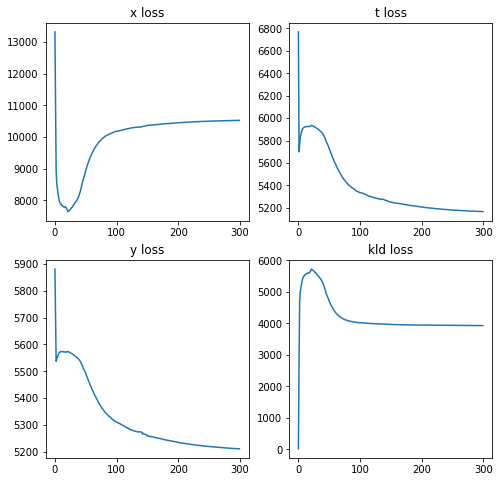

Total loss in the end:  24835.525024414062
Estimated causal effect: [[0.64496523 0.35503477]
 [0.80929875 0.19070125]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


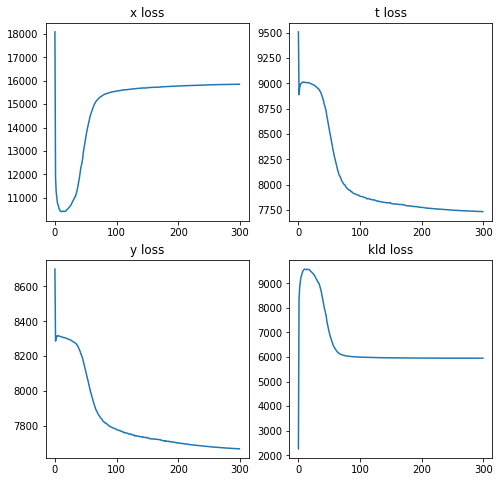

Total loss in the end:  37214.43099975586
Estimated causal effect: [[0.6536268  0.3463732 ]
 [0.82503527 0.17496474]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


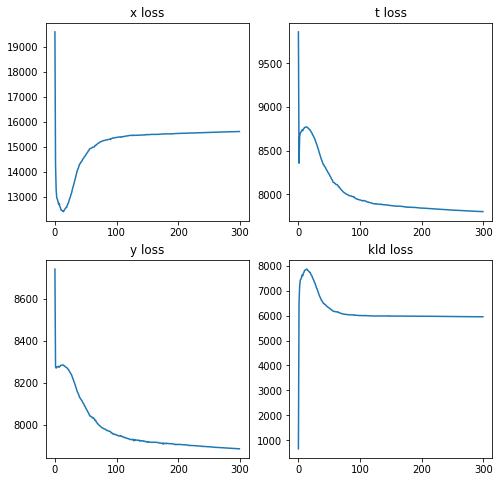

Total loss in the end:  37264.040283203125
Estimated causal effect: [[0.66095078 0.33904919]
 [0.80983579 0.19016421]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


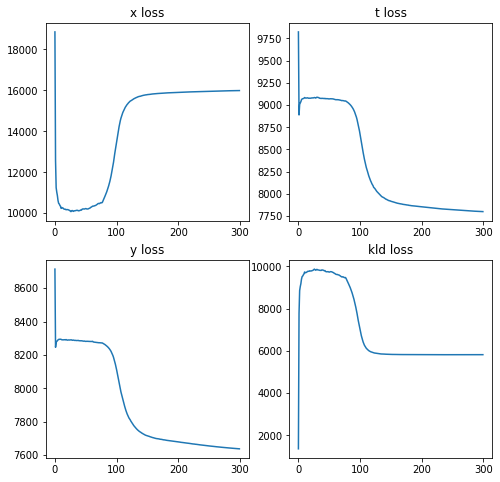

Total loss in the end:  37246.26348876953
Estimated causal effect: [[0.66624486 0.33375511]
 [0.82237864 0.17762136]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


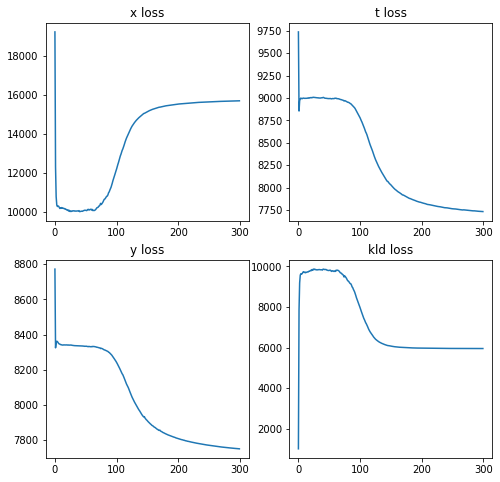

Total loss in the end:  37135.1867980957
Estimated causal effect: [[0.66548681 0.33451322]
 [0.82464242 0.17535757]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


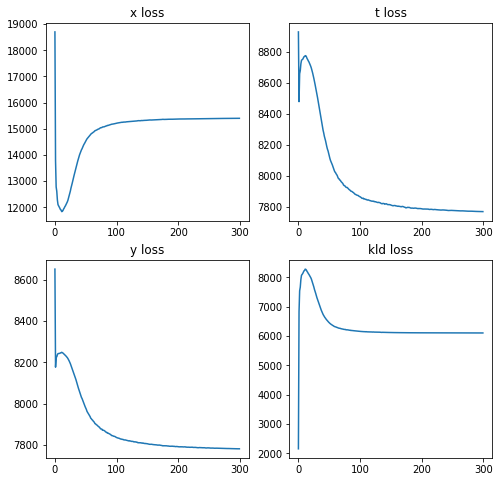

Total loss in the end:  37057.07614135742
Estimated causal effect: [[0.66230851 0.33769149]
 [0.81058973 0.18941024]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


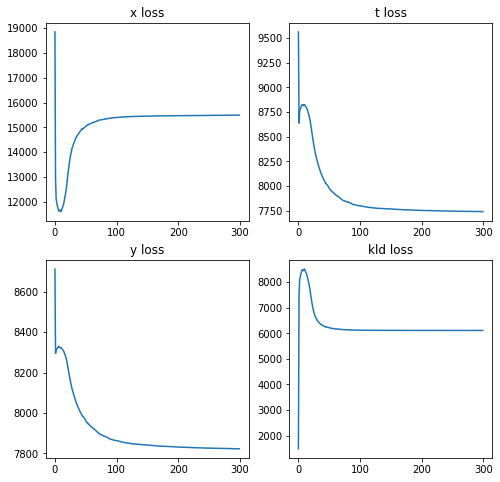

Total loss in the end:  37165.490173339844
Estimated causal effect: [[0.65285218 0.34714788]
 [0.79916763 0.20083237]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


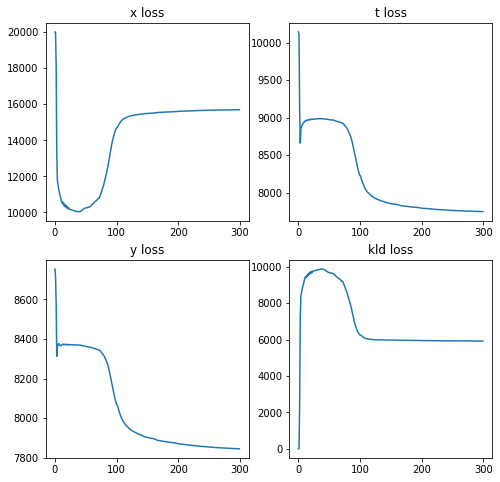

Total loss in the end:  37205.458557128906
Estimated causal effect: [[0.66028678 0.33971325]
 [0.80470932 0.1952907 ]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


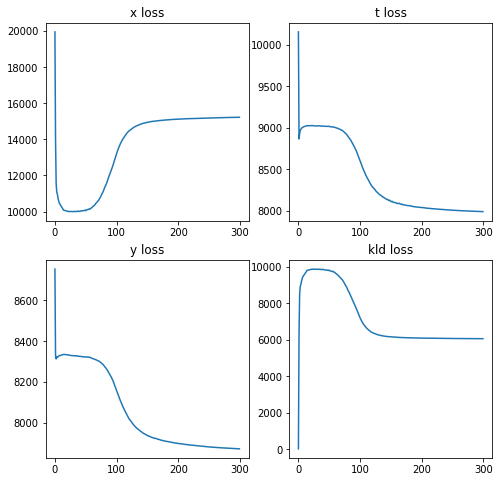

Total loss in the end:  37153.80419921875
Estimated causal effect: [[0.66906595 0.33093408]
 [0.80420053 0.19579948]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


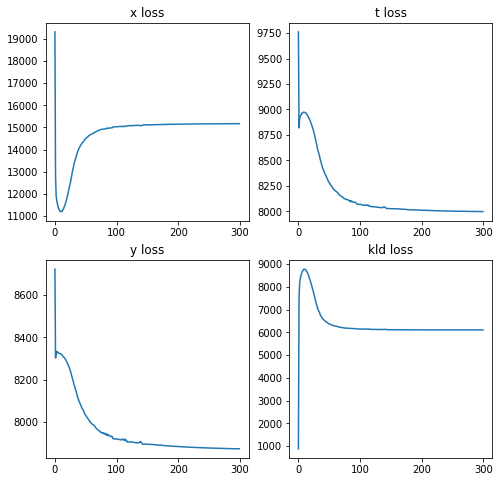

Total loss in the end:  37145.87600708008
Estimated causal effect: [[0.65765929 0.34234074]
 [0.79528618 0.20471376]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


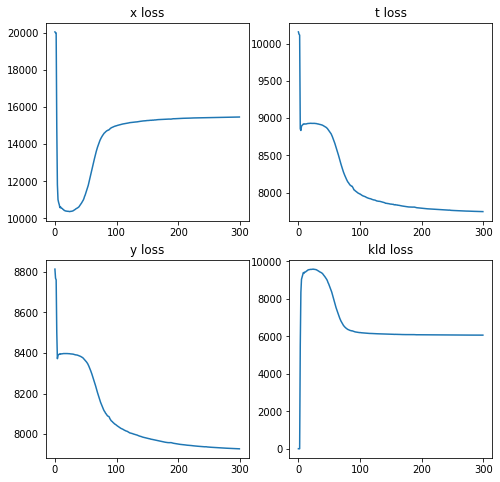

Total loss in the end:  37206.62875366211
Estimated causal effect: [[0.6602881  0.33971193]
 [0.79160047 0.2083995 ]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


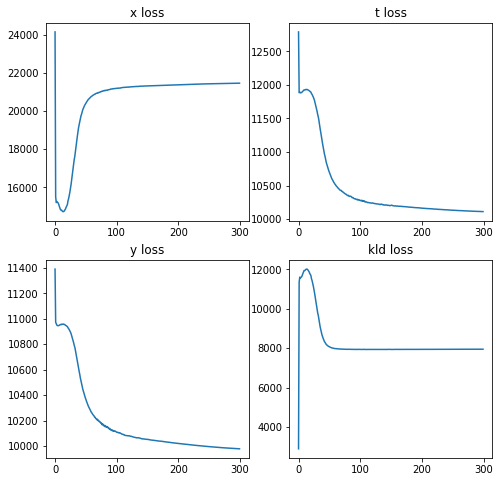

Total loss in the end:  49492.256439208984
Estimated causal effect: [[0.64847553 0.35152444]
 [0.82427388 0.1757261 ]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


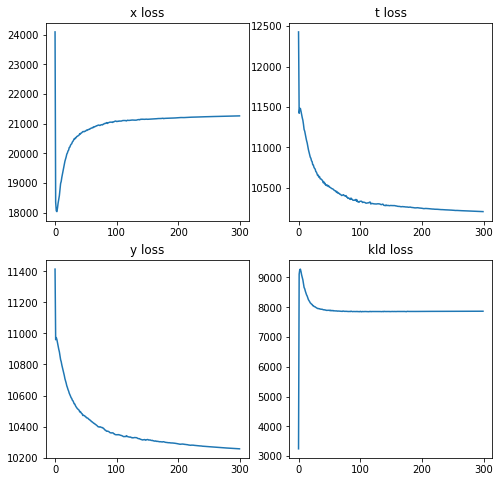

Total loss in the end:  49594.33529663086
Estimated causal effect: [[0.6514498  0.3485502 ]
 [0.82405841 0.17594162]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


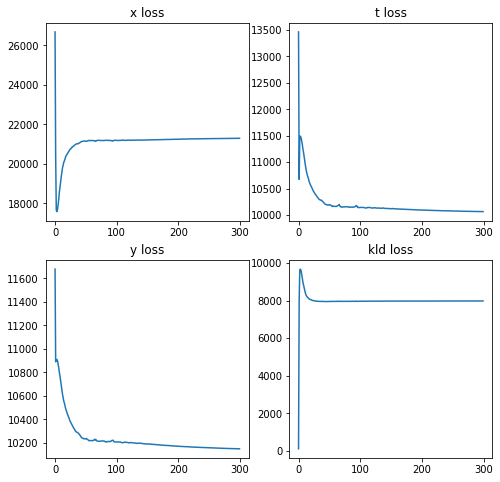

Total loss in the end:  49480.97732543945
Estimated causal effect: [[0.64745289 0.35254714]
 [0.81755233 0.18244769]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


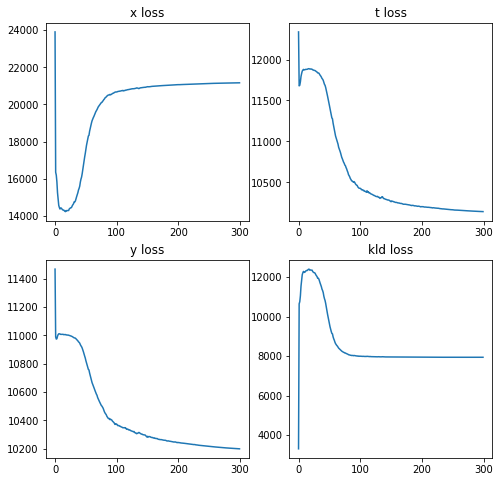

Total loss in the end:  49446.21447753906
Estimated causal effect: [[0.65536749 0.34463251]
 [0.82916462 0.17083539]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


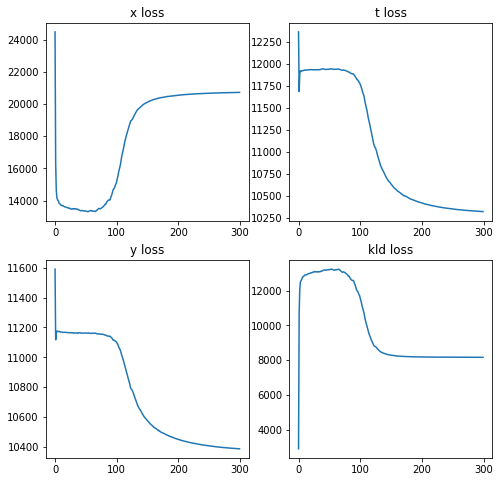

Total loss in the end:  49580.339904785156
Estimated causal effect: [[0.64204425 0.35795578]
 [0.80478334 0.19521673]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


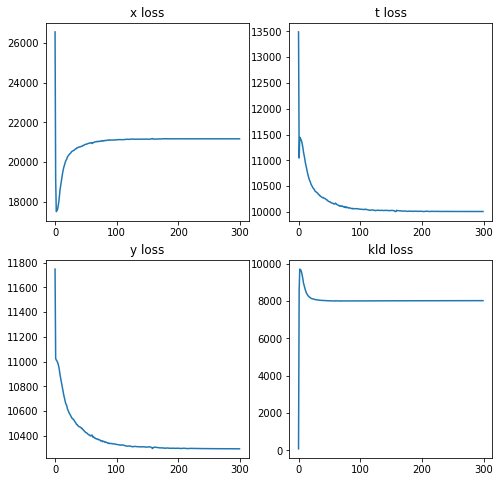

Total loss in the end:  49483.189514160156
Estimated causal effect: [[0.63754702 0.36245298]
 [0.80903709 0.1909629 ]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


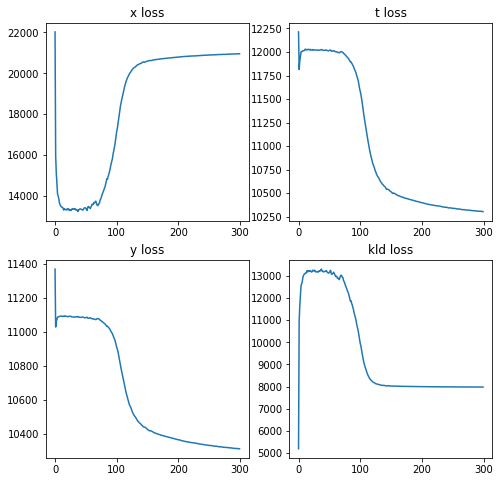

Total loss in the end:  49549.89666748047
Estimated causal effect: [[0.6582247  0.3417753 ]
 [0.80529404 0.19470592]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


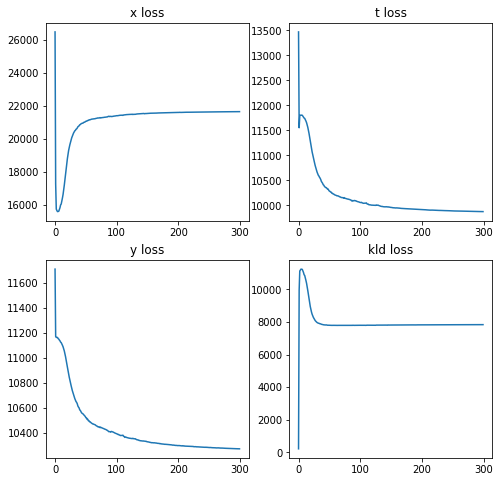

Total loss in the end:  49626.06137084961
Estimated causal effect: [[0.64302593 0.35697404]
 [0.82993066 0.17006938]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


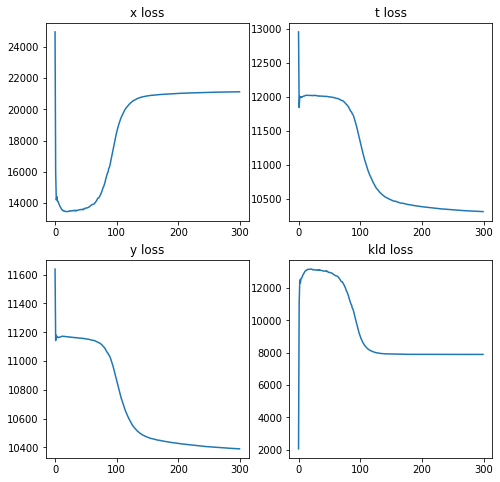

Total loss in the end:  49706.78402709961
Estimated causal effect: [[0.64821392 0.35178605]
 [0.82168794 0.178312  ]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


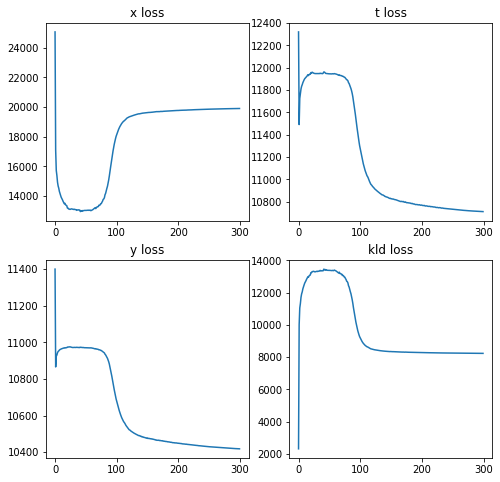

Total loss in the end:  49267.516662597656
Estimated causal effect: [[0.68420959 0.31579044]
 [0.81919098 0.18080904]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


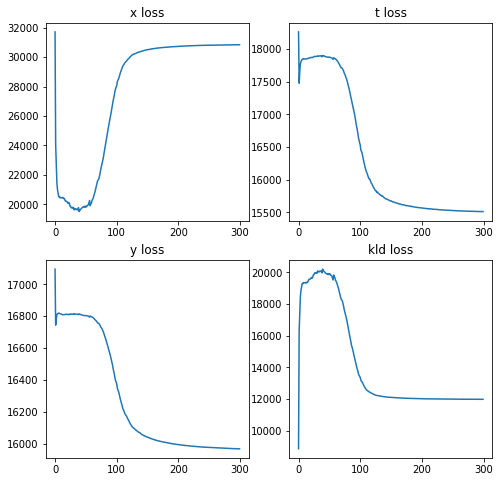

Total loss in the end:  74306.10144042969
Estimated causal effect: [[0.66605902 0.33394098]
 [0.80257565 0.19742437]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


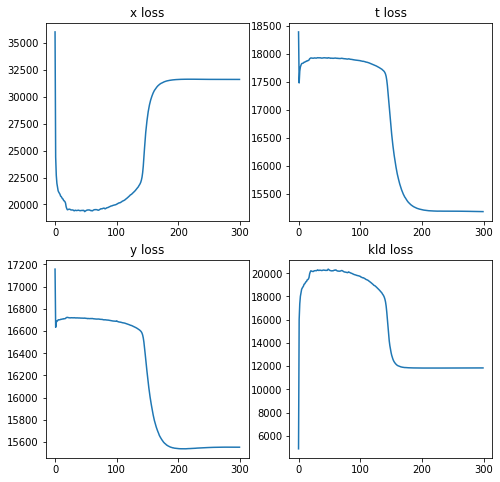

Total loss in the end:  74215.74899291992
Estimated causal effect: [[0.65272927 0.3472707 ]
 [0.82110488 0.17889513]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


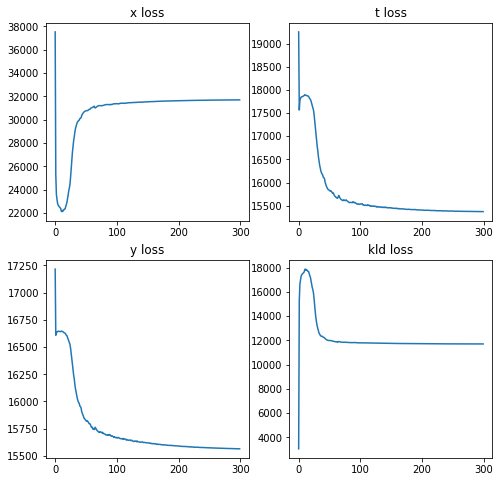

Total loss in the end:  74341.22528076172
Estimated causal effect: [[0.65274686 0.34725314]
 [0.81731379 0.18268624]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


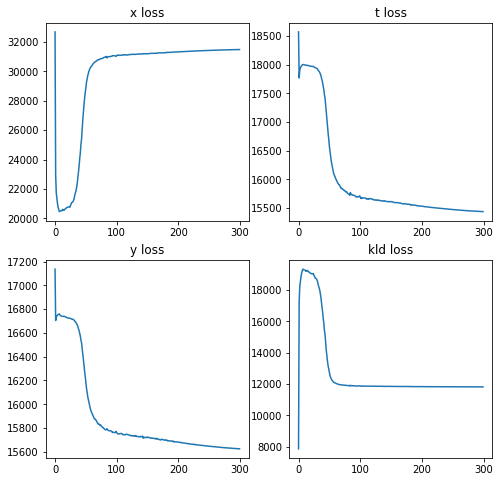

Total loss in the end:  74365.41543579102
Estimated causal effect: [[0.65610474 0.34389523]
 [0.80735469 0.19264537]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


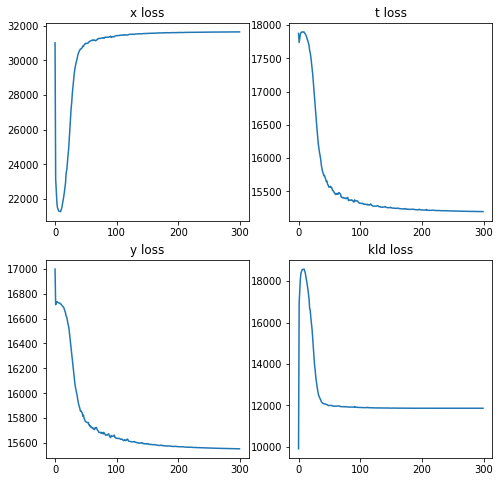

Total loss in the end:  74264.39453125
Estimated causal effect: [[0.64881384 0.35118616]
 [0.81726468 0.18273532]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


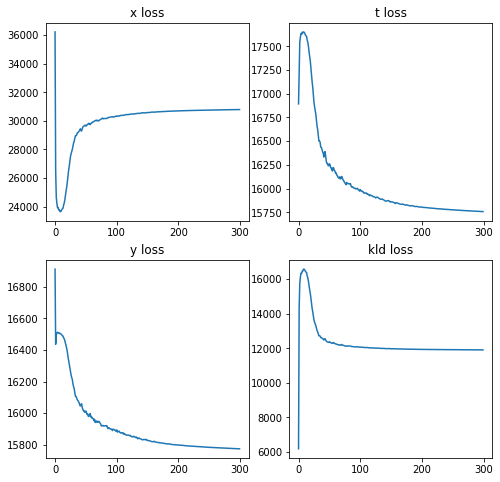

Total loss in the end:  74233.58374023438
Estimated causal effect: [[0.67755461 0.32244542]
 [0.8053987  0.19460131]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


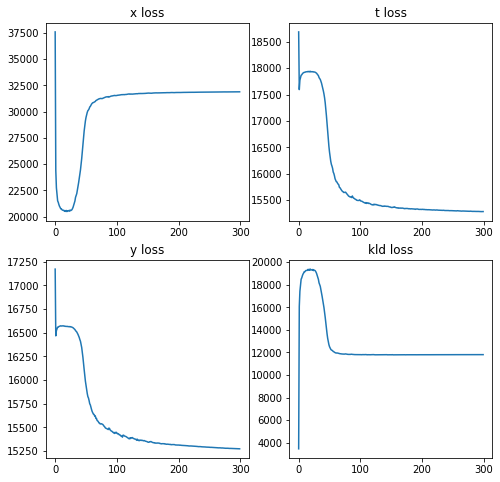

Total loss in the end:  74229.58319091797
Estimated causal effect: [[0.65819472 0.34180525]
 [0.83055001 0.16944996]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


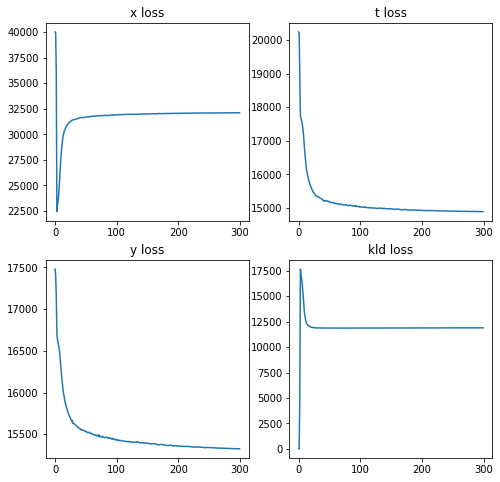

Total loss in the end:  74215.32141113281
Estimated causal effect: [[0.6477291  0.3522709 ]
 [0.82751805 0.17248194]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


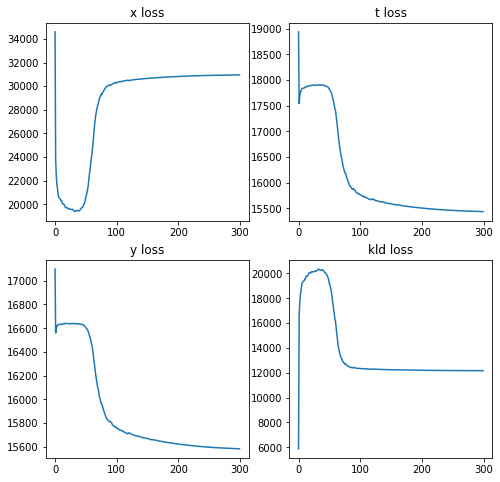

Total loss in the end:  74147.00625610352
Estimated causal effect: [[0.65722984 0.34277016]
 [0.81502753 0.18497248]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


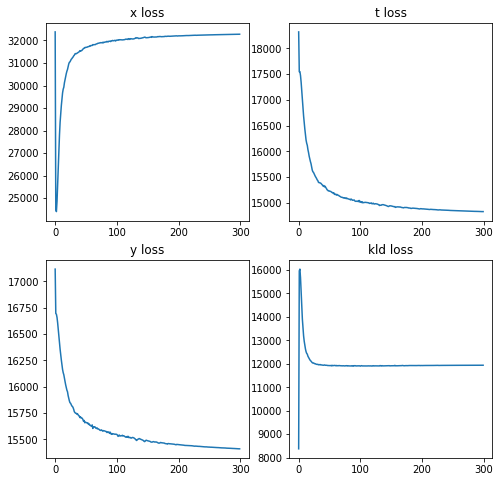

Total loss in the end:  74456.2905883789
Estimated causal effect: [[0.63760841 0.36239153]
 [0.82221413 0.17778593]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


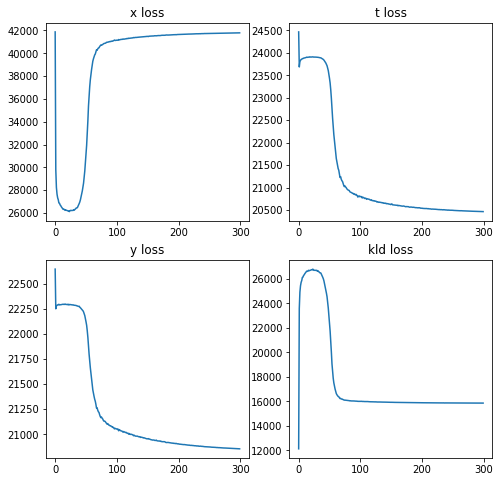

Total loss in the end:  98965.31423950195
Estimated causal effect: [[0.65701336 0.34298664]
 [0.81315839 0.18684158]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


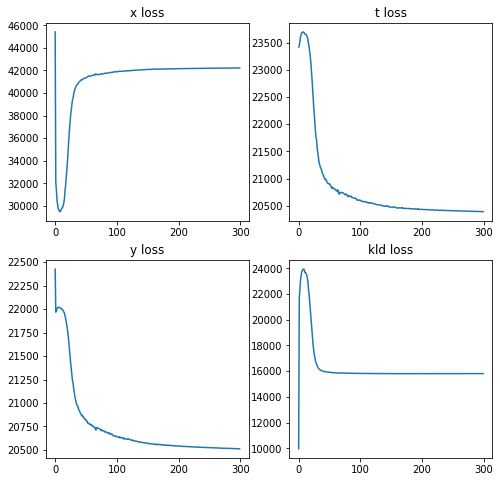

Total loss in the end:  98934.8344116211
Estimated causal effect: [[0.65896952 0.34103048]
 [0.8210972  0.1789028 ]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


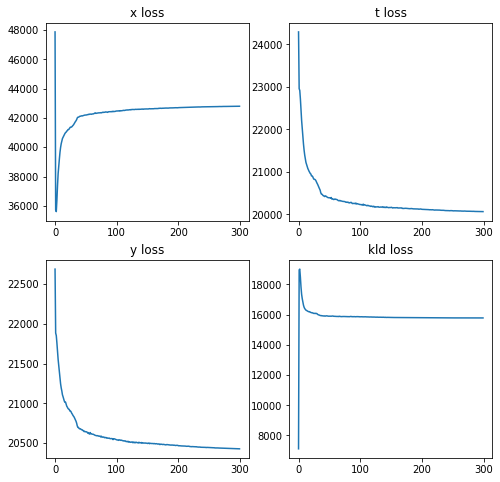

Total loss in the end:  99063.00085449219
Estimated causal effect: [[0.6481508  0.3518492 ]
 [0.82024431 0.1797557 ]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


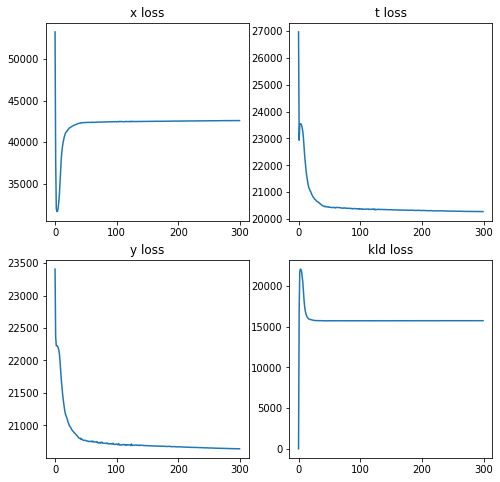

Total loss in the end:  99243.21115112305
Estimated causal effect: [[0.65016055 0.34983945]
 [0.82169962 0.17830038]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


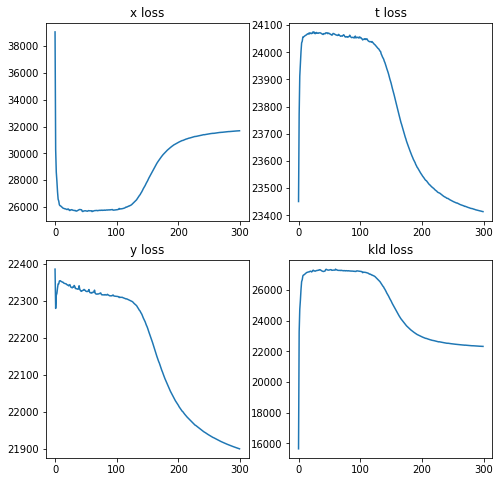

Total loss in the end:  99319.21676635742
Estimated causal effect: [[0.71191323 0.28808677]
 [0.78604263 0.21395738]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


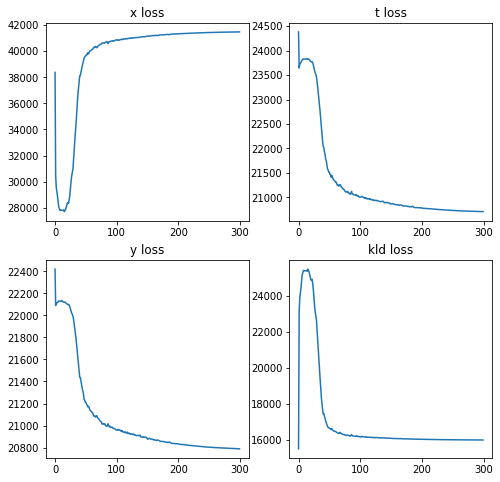

Total loss in the end:  98980.51879882812
Estimated causal effect: [[0.66432834 0.33567169]
 [0.81515831 0.18484166]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


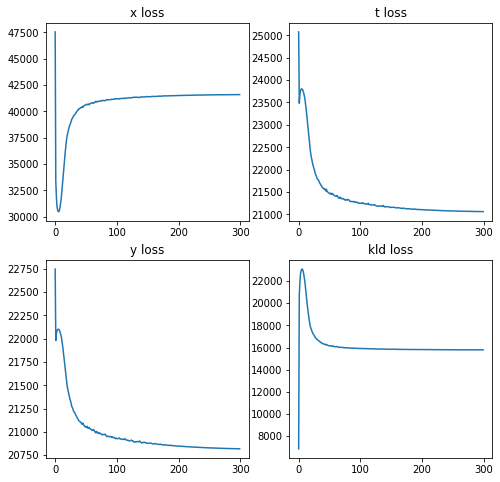

Total loss in the end:  99262.66790771484
Estimated causal effect: [[0.66271549 0.33728448]
 [0.81146395 0.18853608]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


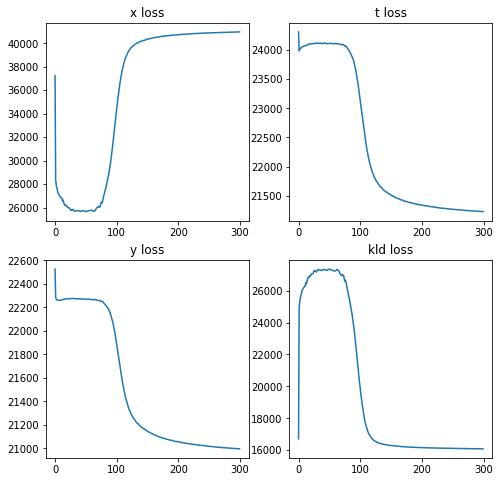

Total loss in the end:  99273.44708251953
Estimated causal effect: [[0.66554201 0.33445799]
 [0.79905075 0.20094928]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


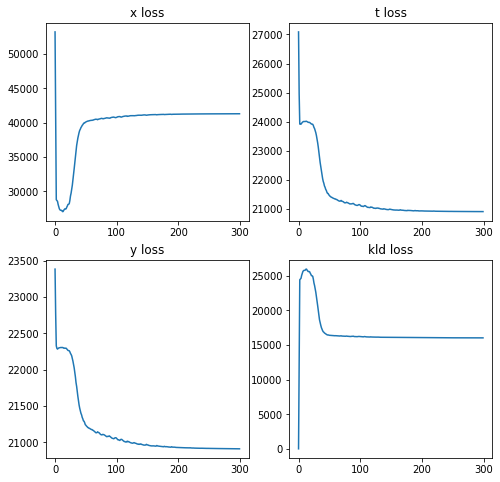

Total loss in the end:  99145.74517822266
Estimated causal effect: [[0.66231382 0.33768618]
 [0.8037743  0.1962257 ]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


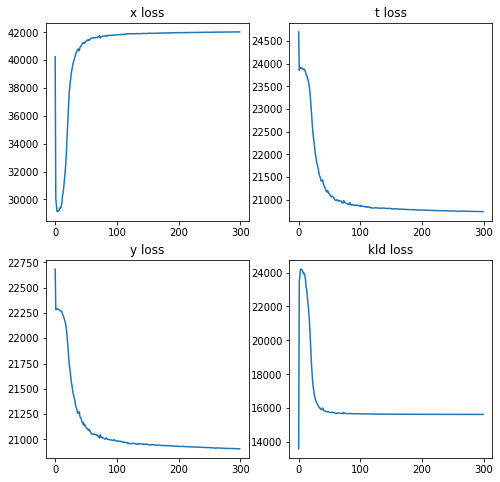

Total loss in the end:  99304.94067382812
Estimated causal effect: [[0.66133976 0.33866024]
 [0.81030524 0.18969478]] true value: [[0.65640439 0.34359561]
 [0.81790822 0.18209178]]


In [55]:
# Run the model
models, losses = run_model_for_predef_datasets(datasets, param_times, main_folder, sub_folder_model, 
                                               BATCH_SIZE, track_function, true_value, 
                                               device, train_arguments, labels, data_labels)

# Plotting results

### Load the data and models

In [10]:
data_sub_folder = sub_folder_params + "data1000to40000"
param_times = 10
dfs, datasets = load_dfs(main_folder, data_sub_folder, param_times=param_times)
datasize = sorted([int(ds) for ds in dfs.keys()])

data_sub_folder_extra = sub_folder_params + "data1000to40000_additional"
param_times_extra = 40
dfs_extra, datasets_extra = load_dfs(main_folder, data_sub_folder_extra, param_times=param_times_extra)
datasize = sorted([int(ds) for ds in dfs.keys()])

In [11]:
device = 'cpu'

num_epochs=200
lr_start=0.01
lr_end=0.001
z_dim=10
p_y_zt_nn_layers=3
p_y_zt_nn_width=30
p_t_z_nn_layers=3
p_t_z_nn_width=30
p_x_z_nn_layers=3
p_x_z_nn_width=30
q_z_nn_layers=3
q_z_nn_width=30
t_mode=2
y_mode=2
x_mode=np.array([2,2])
x_dim = 2
ty_separate_enc=False
z_mode=0
x_loss_scaling=1
common_stds = False

train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]
labels = [str(dsize) for dsize in datasize]
sub_folder_model = sub_folder_params + "data1000to80000NNmodels"
models_NN, losses_NN = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)


num_epochs=200
lr_start=0.01
lr_end=0.001
z_dim=1
p_y_zt_nn_layers=3
p_y_zt_nn_width=30
p_t_z_nn_layers=3
p_t_z_nn_width=30
p_x_z_nn_layers=3
p_x_z_nn_width=30
q_z_nn_layers=3
q_z_nn_width=30
t_mode=2
y_mode=2
x_mode=np.array([2,2])
x_dim = 2
ty_separate_enc=False
z_mode=2
train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]
sub_folder_model = "params1data1000to80000NNmodelsbinaryz"
models_NN_binaryz, losses_NN_binaryz = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

### Process results

In [12]:
bAID_NN = np.zeros((param_times, len(labels)))
bAID_NN_binaryz = np.zeros((param_times, len(labels)))

gothrough = [(bAID_NN, models_NN),(bAID_NN_binaryz, models_NN_binaryz)]
for AID_,models_ in gothrough:
    for i,label in enumerate(labels):
        print(label)
        for j in range(param_times):
            AID_[j,i] = estimate_AID(models_[label][j],z_probs,t_probs,y_probs,n=10000)

In [13]:
# analytical AIDs
from binary_analytical_methods import *
AID_miao = np.zeros((param_times+param_times_extra,len(labels)))
py_dots_miao = np.zeros((param_times+param_times_extra,len(labels),2))
for i, label in enumerate(labels):
    print(label)
    for j in range(param_times):
        py_dot1, py_dot0 = analytical_miao_pydot(dfs[label][j])
        py_dot_miao = np.array([[1-py_dot0.item(), py_dot0.item()],[1-py_dot1.item(), py_dot1.item()]])
        py_dots_miao[j,i,:] = np.array([py_dot0.item(),py_dot1.item()])
        AID_miao[j,i] = estimate_AID_from_py_dot(py_dot_miao, z_probs, t_probs, y_probs)
    for j in range(param_times, param_times + param_times_extra):
        py_dot1, py_dot0 = analytical_miao_pydot(dfs_extra[label][j-param_times])
        py_dot_miao = np.array([[1-py_dot0.item(), py_dot0.item()],[1-py_dot1.item(), py_dot1.item()]])
        py_dots_miao[j,i,:] = np.array([py_dot0.item(),py_dot1.item()])
        AID_miao[j,i] = estimate_AID_from_py_dot(py_dot_miao, z_probs, t_probs, y_probs)

In [14]:
true_pydot = estimate_true_py_dot(z_probs,y_probs)[:,1]

In [15]:
py_dots_NN = np.zeros((param_times,len(labels),2))
py_dots_binaryz = np.zeros((param_times,len(labels),2))
gothrough = [(py_dots_NN, models_NN),(py_dots_binaryz, models_NN_binaryz)]
for py_dots_,models_ in gothrough:
    for i,label in enumerate(labels):
        for j in range(param_times):
            py_dot = estimate_model_py_dot(models_[label][j],n=10000)
            py_dots_[j,i,:] = py_dot[:,1]

### Plot full CEVAE vs analytical results

In [16]:
labels = [str(ds) for ds in datasize]

In [17]:
import seaborn as sns
fig, ax = plt.subplots(1,3,figsize=(15,4), gridspec_kw = {"width_ratios":[7,5,5]})
palette = sns.color_palette("pastel")#plt.get_cmap('Set3')
places = list(range(len(labels)))
width = 0.15
diff = 0.23
for i in range(3,len(labels)):
    bplot1 = ax[0].boxplot(bAID_NN[~np.isnan(bAID_NN[:,i])][:,i], positions=[places[i]-diff*0.5], widths=[width],patch_artist=True)
    #bplot2 = ax[0].boxplot(bAID_NN_binaryz[~np.isnan(bAID_NN_binaryz[:,i])][:,i], positions=[places[i]], widths=[width],patch_artist=True)
    bplot3 = ax[0].boxplot(AID_miao[:,i], positions=[places[i]+diff*0.5],widths=[width],patch_artist=True)
    colors = [palette[num] for num in range(4)]
    for j,bplot in [(0,bplot1),(2,bplot3)]:
        for patch in bplot['boxes']:
            patch.set_facecolor(colors[j])

from matplotlib.lines import Line2D
from matplotlib.patches import Patch
custom_lines = [Patch(facecolor=palette[i], edgecolor='black') for i in (0,2)]
ax[0].legend(custom_lines, ["CEVAE", "Analytical"], frameon=False, fontsize=12)
ax[0].set_ylabel("AID", fontsize=15)
ax[0].set_title("Binary data", fontsize=18)
ax[0].set_ylim(0,1)

ax[1].plot([places[3],places[-1]],[true_pydot[0],true_pydot[0]],'--')
ax[1].plot([places[3],places[-1]],[true_pydot[1],true_pydot[1]],'--')
ax[1].legend(["True $p(y=1|do(t=0))$","True $p(y=1|do(t=1))$"], frameon=False, fontsize=15, loc="right",
            bbox_to_anchor=(1.03,0.5))
ax[1].boxplot(py_dots_NN[:,3:,1], positions=places[3:])
ax[1].boxplot(py_dots_NN[:,3:,0], positions=places[3:])
ax[1].set_ylabel("$p(y|do(t))$ estimate", fontsize=15)
ax[1].set_title("CEVAE", fontsize=18)

ax[2].plot([places[3],places[-1]],[true_pydot[0],true_pydot[0]],'--')
ax[2].plot([places[3],places[-1]],[true_pydot[1],true_pydot[1]],'--')
#ax[2].legend(["True $p(y=1|do(t=1))$","True $p(y=1|do(t=0))$"], frameon=False, fontsize=12)
ax[2].boxplot(py_dots_miao[:,3:,1], positions=places[3:])
ax[2].boxplot(py_dots_miao[:,3:,0], positions=places[3:])
ax[2].set_ylabel("$p(y|do(t))$ estimate", fontsize=15)
ax[2].set_title("Analytical method", fontsize=18)
ax[2].set_ylim(0,1)

for i in range(3):
    ax[i].set_xlabel("Sample size", fontsize=15)
    ax[i].set_xticks(places[3:])
    ax[i].set_xticklabels(datasize[3:], fontsize=14, rotation=30)
    ax[i].tick_params(axis='y', which='major', labelsize=14)
ax[0].tick_params(axis='x', which='major', labelsize=14, rotation=0)
        
for i in range(3):
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["top"].set_visible(False)

plt.show()

### Plot binary CEVAE results

In [18]:
import seaborn as sns
fig, ax = plt.subplots(1,2,figsize=(12,5), gridspec_kw = {"width_ratios":[7,5]})
palette = sns.color_palette("pastel")
places = list(range(len(labels)))
width = 0.15
diff = 0.23
for i in range(0,len(labels)):
    bplot1 = ax[0].boxplot(bAID_NN_binaryz[~np.isnan(bAID_NN_binaryz[:,i])][:,i], positions=[places[i]], widths=[width],patch_artist=True)
    colors = [palette[num] for num in range(4)]
    for j,bplot in [(0,bplot1)]:
        for patch in bplot['boxes']:
            patch.set_facecolor(colors[j])

from matplotlib.lines import Line2D
from matplotlib.patches import Patch
custom_lines = [Patch(facecolor=palette[i], edgecolor='black') for i in (0,2)]
ax[0].set_ylabel("AID", fontsize=15)
ax[0].set_title("Binary CEVAE", fontsize=18)

ax[1].plot([places[0],places[-1]],[true_pydot[0],true_pydot[0]],'--')
ax[1].plot([places[0],places[-1]],[true_pydot[1],true_pydot[1]],'--')
ax[1].legend(["True $p(y=1|do(t=0))$","True $p(y=1|do(t=1))$"], frameon=False, fontsize=15, loc="right",
            bbox_to_anchor=(1.03,0.5))
ax[1].boxplot(py_dots_binaryz[:,:-2,1], positions=places[:])
ax[1].boxplot(py_dots_binaryz[:,:-2,0], positions=places[:])
ax[1].set_ylabel("$p(y|do(t))$ estimate", fontsize=15)
ax[1].set_title("", fontsize=18)


for i in range(2):
    ax[i].set_xlabel("Sample size", fontsize=15)
    ax[i].set_xticks(places[:])
    ax[i].set_xticklabels(datasize[:], fontsize=14, rotation=30)
    ax[i].tick_params(axis='y', which='major', labelsize=14)
ax[0].tick_params(axis='x', which='major', labelsize=14, rotation=0)
        
for i in range(2):
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["top"].set_visible(False)

plt.tight_layout()
plt.savefig("Figures/publication/appendix_binarycevae_working.png", bbox_inches = 'tight',
    pad_inches = 0, dpi=200)
plt.show()